# Miniproject: Hopfield networks
### SCIPER: 308932

In [1]:
# start with importing the libraries we need

%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hopfield_network import pattern_tools, plot_tools, network
import neurodynex3.hopfield_network.pattern_tools as tools

## 1 Theory questions

## 2 Capacity

**Question 2.2**: Firstly, we use the alternative more efficient way to store the patterns and compare it with the neurodynex version

In [2]:
class Hopfield_fast(network.HopfieldNetwork):
    def __init__(self, nr_neurons):
        super().__init__(nr_neurons)
    
    def store_patterns(self, pattern_list):
        # check if the input is a list or a numpy array
        if type(pattern_list) == list:
            pattern_list = np.array(pattern_list)
        pattern_list = pattern_list.reshape(pattern_list.shape[0],-1)
        pattern_size = pattern_list.shape[1]
        # fill in the following line for make the Hopfield_fast class to run
        self.weights = 1 / pattern_size  * np.einsum('mn,nk->mk', pattern_list.T, pattern_list) 
        np.fill_diagonal(self.weights, 0)

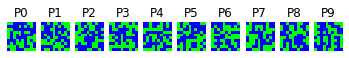

All the weights are the same:  True


In [3]:
# Before you continue test that your weights are correct (compare with the neurodynex version)

## we define the number of patterns as 10 to do a test
nr_patterns = 10 
## pattern size should be the square root of number of neurons
pattern_size = 10

## create an instance of the class HopfieldNetwork by neurodynex version
hopfield_net_class = network.HopfieldNetwork(nr_neurons= pattern_size**2)
## create an instance of the fast HopfieldNetwork by we defined above.
hopfield_net_fast=Hopfield_fast(nr_neurons=pattern_size**2)

## instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

## Create the random patterns 
pattern_list = factory.create_random_pattern_list(nr_patterns, on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)

## let the hopfield network "learn" the patterns. 
hopfield_net_class.store_patterns(pattern_list)
hopfield_net_fast.store_patterns(pattern_list)

## test that your weights are correct (compare with the neurodynex version)
assert (hopfield_net_class.weights==hopfield_net_fast.weights).all()
print('All the weights are the same: ', (hopfield_net_class.weights==hopfield_net_fast.weights).all())

**Question 2.2**: Then, we can plot the probability for pattern p1 to be effectively stored decreases with the number of patterns P. We make the plot for these two hopfield networks and we can compare these results

In [4]:
# initializa some parameters

## pattern size should be the square root of number of neurons
pattern_size = 10
## times for run the hopfield_net, generate many random Hopfield networks to estimate the probability.
simulation_times_run_script=10000
## numpy array about number of patterns
pattern_iter=np.arange(1,101,1)

In [5]:
def calculate_probability(Network_type, pattern_iter, pattern_size, simulation_times_run_script):
    probability_results=np.zeros(pattern_iter.shape)
    
    for pattern_num, x in zip(pattern_iter, range(pattern_iter.shape[0])):
        
        ##create an instance of the class HopfieldNetwork
        if Network_type=='class':
            hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
        elif Network_type=='fast':
            hopfield_net = Hopfield_fast(nr_neurons= pattern_size**2)
        else:
            print(" network type error")
            
        ## instantiate a pattern factory
        factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
        ## define a calculator
        idx=0
        
        for i in range(simulation_times_run_script):
            ## Create the random patterns 
            pattern_list=factory.create_random_pattern_list(nr_patterns=pattern_num, on_probability=0.5)
            ## let the hopfield network "learn" the patterns. 
            hopfield_net.store_patterns(pattern_list)
            ## initialize with original pattern
            hopfield_net.set_state_from_pattern(pattern_list[0])
            ## from this initial state, let the network dynamics evolve. Because we fix the time steps as 5, so the number there is 5-4=1
            states = hopfield_net.run_with_monitoring(nr_steps=4)
            ## reshape the network to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)
            
            # Calculate the overlap 
            overlaps_list = pattern_tools.compute_overlap_list(pattern_list[0], states_as_patterns)
            if overlaps_list[len(overlaps_list)-1] >= 0.99:
                idx += 1
        probability_results[x]=idx/simulation_times_run_script
    return probability_results        

In [ ]:
probability_fast=calculate_probability("fast",pattern_iter,pattern_size, simulation_times_run_script)
probability_class=calculate_probability("class",pattern_iter,pattern_size, simulation_times_run_script)

In [ ]:
#def plot_prob_patterns(pattern_iter,probability_fast):
    
    

## 3 From binary neurons to saturated rectified linear neurons.

**Question 3.1:** the graph of function g for $\beta =1$

In [8]:
# define the gain function with beta=1
def g(beta,h):
    out=np.minimum(1, np.maximum(-1, beta*h))
    return out

# assign the values of x-axis and y-axis
gx_values=np.linspace(-5, 5, 100)
gy_values=[g(1,i) for i in gx_values]

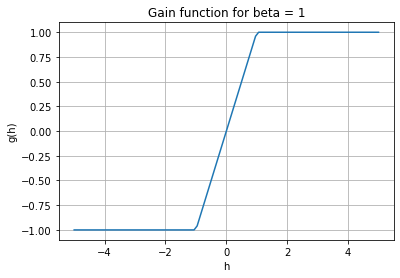

In [9]:
# plot the g function
plt.figure()
plt.plot(gx_values, gy_values)
plt.xlabel('h')
plt.ylabel('g(h)')
plt.title('Gain function for beta = 1')
plt.grid(True)

**Question 3.2:**  theory questions

**Question 3.3:**  In this question, we need to consider the influence of steepness $\beta$ on the capacity of network. So, we plot the capacity as a function of $\beta$

## 4 Correlated patterns

# In order to use the class, complete the code and fill the question marks

In [ ]:
# Alternative more efficient way store the patterns

class Hopfield_fast(network.HopfieldNetwork):
    def __init__(self, nr_neurons):
        super().__init__(nr_neurons)
    
    def store_patterns(self, pattern_list):
        # check if the input is a list or a numpy array
        if type(pattern_list) == list:
            pattern_list = np.array(pattern_list)
        pattern_list = pattern_list.reshape(pattern_list.shape[0],-1)
        pattern_size = pattern_list.shape[1]
        # fill in the following line for make the Hopfield_fast class to run
        self.weights = 1 / pattern_size  * np.einsum('?,?->?', ?, ?) 
        np.fill_diagonal(self.weights, 0)
        

In [ ]:
# Before you continue test that your weights are correct (compare with the neurodynex version)
nr_patterns = ?
pattern_size = ? 

print('All the weights are the same', ??)